# An example using Feature weighted ECM clustering


In [1]:
## Importing
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import numpy as np
import matplotlib.pyplot as plt
from evclust.ecm import ecm
from evclust.fwecm import fwecm
from evclust.utils import ev_summary, ev_plot, ev_pcaplot
from sklearn.decomposition import PCA
import pandas as pd
from sklearn.metrics import adjusted_rand_score
import seaborn as sns
from ucimlrepo import fetch_ucirepo 
from sklearn.preprocessing import LabelEncoder
from evclust.datasets import load_letters


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


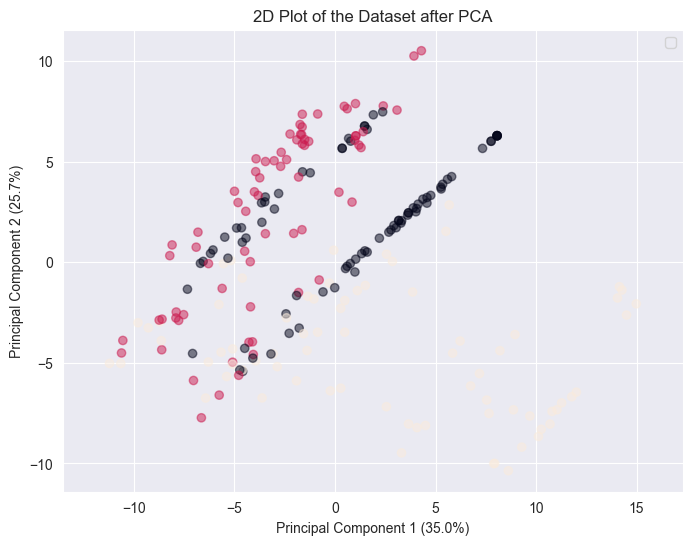

In [2]:
# fetch dataset
df = load_letters()

# data (as pandas dataframes)
y = pd.DataFrame(df.iloc[:, -1])
X = df.iloc[:, :-1]

labels_encoder = LabelEncoder()
numeric_labels = labels_encoder.fit_transform(y['class'])
#Covariance matrix
# labels = np.unique(y['class'])
# cov_mat1 = np.cov(X[y['class'] == labels[0]].transpose())
# cov_mat2 = np.cov(X[y['class'] == labels[1]].transpose())
# cov_mat3 = np.cov(X[y['class'] == labels[2]].transpose())
# print(f"Covariance Matrix 1: {cov_mat1.diagonal()}")
# print(f"Covariance Matrix 2: {cov_mat2.diagonal()}")
# print(f"Covariance Matrix 3: {cov_mat3.diagonal()}")

# Scatter matrix plot
# sns.pairplot(df, corner=True, hue="class")

# Perform PCA for dimensionality reduction
pca = PCA(n_components=2)  # Reduce to 2 dimensions
data_reduced = pca.fit_transform(X)
variance_percent = np.round(pca.explained_variance_ratio_ * 100, 1)

# Plot the reduced dataset with different colors for each cluster
plt.figure(figsize=(8, 6))
plt.scatter(data_reduced[:, 0], data_reduced[:, 1], alpha=0.5, c=numeric_labels)
plt.title('2D Plot of the Dataset after PCA')
plt.xlabel(f"Principal Component 1 ({variance_percent[0]}%)")
plt.ylabel(f"Principal Component 2 ({variance_percent[1]}%)")
plt.legend()
plt.grid(True)
plt.axis('equal')
plt.show()


In [3]:
# Non-specificity values
def calculate_non_specificity(cluster_model):
    m = cluster_model['mass']
    F = cluster_model['F']
    c = F.shape[1]
    card = np.sum(F[1:F.shape[0], :], axis=1)

    log_card = np.log2(card)
    tmp = np.tile(log_card.transpose(), (m.shape[0], 1))
    m_log_card = m[:, :-1] * tmp

    mvide = m[:, -1][:, np.newaxis]
    tmp2 = mvide * np.log2(c)
    tmp3 = np.tile(tmp2, (1, m.shape[1] - 1))

    non_specificity = m_log_card + tmp3
    object_non_specificity = np.sum(non_specificity, axis=1)

    print(f"Maximum Non-specificity value: {max(object_non_specificity)}")
    print(f"Minimum Non-specificity value: {min(object_non_specificity)}")
    print(f"Average Non-specificity value: {np.mean(object_non_specificity)}")
    # Plot the values
    # plt.clf()
    # plt.hist(object_non_specificity, bins=30, density=True, alpha=0.7, color='blue')
    # plt.xlabel('Value')
    # plt.ylabel('Density')
    # plt.title('Non-specificity Value Distribution Plot')
    # plt.grid(True)
    # plt.show()

## Traditional ECM

[1, 3613.728358264609]
[2, 3511.4136502406404]
[3, 3495.796764765011]
[4, 3491.81611556811]
[5, 3490.4587482626594]
[6, 3489.892391414335]
[7, 3489.628649503388]
[8, 3489.498118455847]
[9, 3489.4307811349454]
[10, 3489.3948144560554]
[11, 3489.374957458118]
[12, 3489.3636246071237]
[13, 3489.356936421042]
[14, 3489.352856652315]
[15, 3489.350288531127]
[16, 3489.348625072499]
[17, 3489.3475204889546]
[18, 3489.346771677788]
[   0.         3489.34677168 3489.34677168]
[1, 3621.0978913736126]
[2, 3514.8398078103905]
[3, 3496.975124644428]
[4, 3492.1834889068605]
[5, 3490.5549921664356]
[6, 3489.904295405972]
[7, 3489.6183665515205]
[8, 3489.48501893988]
[9, 3489.419968803725]
[10, 3489.386940383772]
[11, 3489.3695016990782]
[12, 3489.359920169011]
[13, 3489.3544371452813]
[14, 3489.3511696148794]
[15, 3489.3491453644883]
[16, 3489.347846346984]
[17, 3489.346987030888]
[1.00000000e+00 3.48934699e+03 3.48934677e+03]
[1, 3621.0978913736126]
[2, 3514.8398078103905]
[3, 3496.975124644427]
[4,

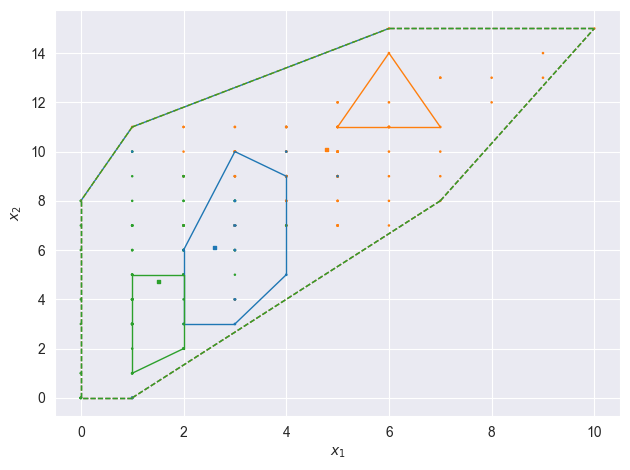

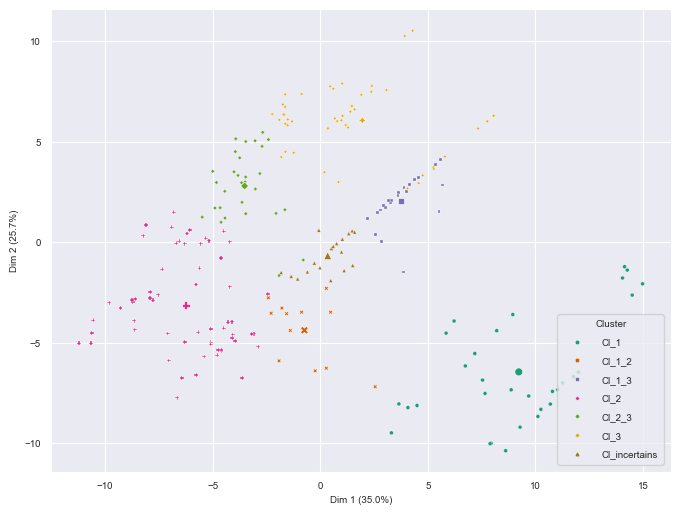

----------Traditional ECM----------
Adjusted Rand Index (ARI): 0.19961223721298782
Maximum Non-specificity value: 3.4398900397431427
Minimum Non-specificity value: 0.805228141778122
Average Non-specificity value: 2.2073908764869086


In [7]:
# Traditional ECM clustering
model = ecm(x=X, c=3, beta=1.9, alpha=0.1, delta=29, ntrials=5)

ev_plot(model, X=X)
ev_pcaplot(data=X, x=model, normalize=False)

# Compute the Adjusted Rand Index (ARI)
true_labels = numeric_labels
Y_betP = model['betp']
predicted_labels = np.argmax(Y_betP, axis=1)

ari = adjusted_rand_score(true_labels, predicted_labels)
print("----------Traditional ECM----------")
print(f"Adjusted Rand Index (ARI): {ari}")

# Calculate Non-specificity
calculate_non_specificity(model)

## Feature weighted ECM (FW-ECM)

[1, 13.650076577811522]
[2, 12.634333930464997]
[3, 12.494927670810242]
[4, 12.441799976139151]
[5, 12.392756927033021]
[6, 12.341740709988445]
[7, 12.302202044126672]
[8, 12.282054961132818]
[9, 12.274708721345075]
[10, 12.27235897009817]
[11, 12.27157055910716]
[12, 12.271265988436372]
[13, 12.271127104762591]
[14, 12.271053846359045]
[15, 12.271011002962943]
[16, 12.270984333748984]
[17, 12.270967154449941]
[18, 12.270955887840282]
[19, 12.27094842980966]
[ 0.         12.27094843 12.27094843]
[1, 23.446838117995952]
[2, 21.398264027802156]
[3, 20.773387929047587]
[4, 20.464805695084376]
[5, 20.28437080097234]
[6, 20.176870467950952]
[7, 20.102139611046375]
[8, 20.03461642010382]
[9, 19.957098237552778]
[10, 19.85413239610175]
[11, 19.711303234977336]
[12, 19.51765849427002]
[13, 19.265689974132282]
[14, 18.95996498478693]
[15, 18.646165473007187]
[16, 18.40904164001181]
[17, 18.286130622867635]
[18, 18.24020189818665]
[19, 18.226286148504443]
[20, 18.22248149521014]
[21, 18.22148013

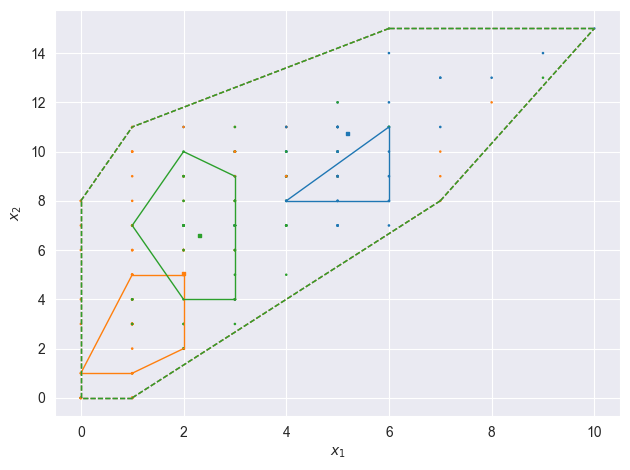

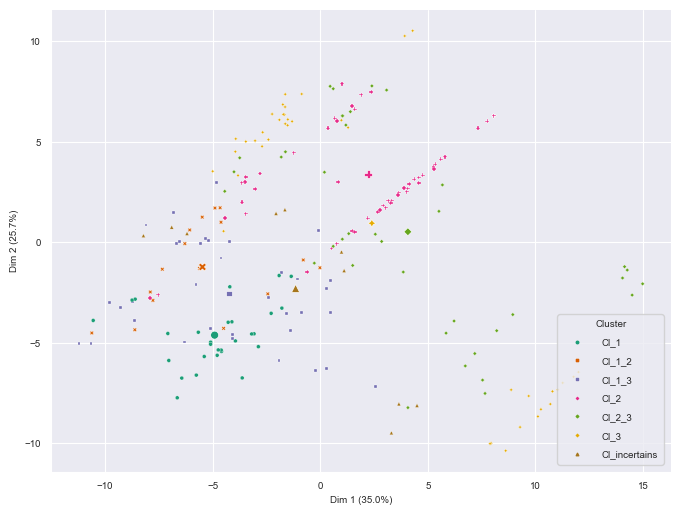

Weight matrix: 
 [[0.01942971 0.0110356  0.07359657 0.06837731 0.04509666 0.0492683
  0.18887582 0.06182847 0.02304586 0.08312045 0.03491534 0.08727412
  0.02488565 0.1679505  0.04472367 0.01657596]
 [0.01358961 0.03543004 0.10076804 0.02709601 0.02590973 0.10047141
  0.02311642 0.09764144 0.01563729 0.01376593 0.02412666 0.12020078
  0.04138309 0.25488603 0.04769026 0.05828726]
 [0.04954369 0.05100379 0.032983   0.03722443 0.25529403 0.01068916
  0.05642156 0.03619028 0.05200558 0.04366931 0.0410331  0.07687653
  0.0408581  0.07609527 0.09617833 0.04393383]]
Covariance Matrix 1: [2.40950384 4.85290007 1.48183089 1.84241789 2.06289308 2.66666667
 2.52830189 2.41369672 1.5        6.19986024 2.45877009 4.11914745
 2.96296296 1.35290007 5.3895877  3.10027952]
Covariance Matrix 2: [ 3.15357644 12.99883123  3.80247779  9.03599813  1.93010753  2.22253389
  3.30224404  3.51215521  3.29382889 16.89434315  2.76718093  1.7026648
  0.79336138  0.30317906  4.79382889  0.87517532]
Covariance Matrix

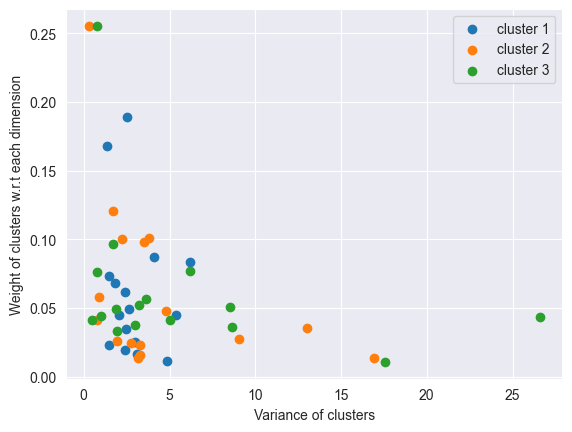

----------Feature weighted ECM----------
Adjusted Rand Index (ARI): 0.22072817972237344 - J value: 11.060594545780463
Maximum Non-specificity value: 3.2075818857306295
Minimum Non-specificity value: 0.73909325155242
Average Non-specificity value: 2.252815832291784


In [8]:
# Feature weighted ECM clustering
c = 3
# W = np.random.dirichlet(np.ones(X.shape[1]), c)
model = fwecm(x=X, c=c, beta=2, alpha=0.1, delta=29, ntrials=10, epsi=1e-5)

ev_plot(model, X=X)
ev_pcaplot(data=X, x=model, normalize=False)

true_labels = numeric_labels
Y_betP = model['betp']
predicted_labels = np.argmax(Y_betP, axis=1)

W = model['W']
print(f"Weight matrix: \n {W}")
cov_mat1 = np.cov(X[predicted_labels == 0].transpose())
cov_mat2 = np.cov(X[predicted_labels == 1].transpose())
cov_mat3 = np.cov(X[predicted_labels == 2].transpose())
print(f"Covariance Matrix 1: {cov_mat1.diagonal()}")
print(f"Covariance Matrix 2: {cov_mat2.diagonal()}")
print(f"Covariance Matrix 3: {cov_mat3.diagonal()}")

W_COV_1 = pd.DataFrame({'y': W[0, :], 'x': cov_mat1.diagonal()})
W_COV_1.sort_values('x', inplace=True)
W_COV_2 = pd.DataFrame({'y': W[1, :], 'x': cov_mat2.diagonal()})
W_COV_2.sort_values('x', inplace=True)
W_COV_3 = pd.DataFrame({'y': W[2, :], 'x': cov_mat3.diagonal()})
W_COV_3.sort_values('x', inplace=True)

plt.clf()
plt.scatter(W_COV_1['x'], W_COV_1['y'], label = "cluster 1", marker='o')
plt.scatter(W_COV_2['x'], W_COV_2['y'], label = "cluster 2", marker='o')
plt.scatter(W_COV_3['x'], W_COV_3['y'], label = "cluster 3", marker='o')
plt.xlabel("Variance of clusters")
plt.ylabel("Weight of clusters w.r.t each dimension")
plt.legend()
plt.show()

# Compute the Adjusted Rand Index (ARI)
ari = adjusted_rand_score(true_labels, predicted_labels)
print("----------Feature weighted ECM----------")
print(f"Adjusted Rand Index (ARI): {ari} - J value: {model['crit']}")

# Calculate Non-specificity
calculate_non_specificity(model)

#### <span style="color:red"> I have tried several times for Weight ECM and the highest ARI value I can get is 28.61. Not like the traditional ECM which has quite stable results, the weighted ECM's results strongly vary by the initial weights. It can be our future works to know how to pick a 'good' weights for different datasets  </span>

## Non-specificity equation
![test.png](assets/Non-specificity.png)